In [22]:
#Importing Libraries
import xgboost
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV#Perforing grid search
from scipy.stats import skew
from collections import OrderedDict
import plotly.express as px
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import *
import math

%matplotlib inline

In [23]:
#Importing the data
train_data = pd.read_csv('../train.csv')
test_data = pd.read_csv('../test.csv')

In [24]:
train_data.describe()

,Weeks,FVC,Percent,Age
count,1549.000000,1549.000000,1549.000000,1549.000000
mean,31.861846,2690.479019,77.672654,67.188509
std,23.247550,832.770959,19.823261,7.057395
min,-5.000000,827.000000,28.877577,49.000000
25%,12.000000,2109.000000,62.832700,63.000000
50%,28.000000,2641.000000,75.676937,68.000000
75%,47.000000,3171.000000,88.621065,72.000000
max,133.000000,6399.000000,153.145378,88.000000


In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1549 non-null   object 
 1   Weeks          1549 non-null   int64  
 2   FVC            1549 non-null   int64  
 3   Percent        1549 non-null   float64
 4   Age            1549 non-null   int64  
 5   Sex            1549 non-null   object 
 6   SmokingStatus  1549 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 84.8+ KB


In [26]:
train_data.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [27]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
train_data['Sex'] = labelencoder.fit_transform(train_data['Sex'])
train_data['Age'] = labelencoder.fit_transform(train_data['Age'])
train_data['SmokingStatus'] = labelencoder.fit_transform(train_data['SmokingStatus'])
test_data['Sex'] = labelencoder.fit_transform(test_data['Sex'])
test_data['Age'] = labelencoder.fit_transform(test_data['Age'])
test_data['SmokingStatus'] = labelencoder.fit_transform(test_data['SmokingStatus'])

In [28]:
train_data.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,29,1,1
1,ID00007637202177411956430,5,2214,55.712129,29,1,1
2,ID00007637202177411956430,7,2061,51.862104,29,1,1
3,ID00007637202177411956430,9,2144,53.950679,29,1,1
4,ID00007637202177411956430,11,2069,52.063412,29,1,1


In [29]:
test_data.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,6,3020,70.186855,2,0,0
1,ID00421637202311550012437,15,2739,82.045291,0,0,0
2,ID00422637202311677017371,6,1930,76.672493,2,0,0
3,ID00423637202312137826377,17,3294,79.258903,1,0,0
4,ID00426637202313170790466,0,2925,71.824968,2,0,1


In [30]:
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=7,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [31]:
every_column_except_y= [col for col in train_data.columns if col not in ['Patient','FVC']]
model.fit(train_data[every_column_except_y],train_data['FVC'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=7,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [32]:
test_data['Prediction'] = model.predict(test_data[every_column_except_y])

In [33]:
test_data

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,Prediction
0,ID00419637202311204720264,6,3020,70.186855,2,0,0,2476.121338
1,ID00421637202311550012437,15,2739,82.045291,0,0,0,2498.568115
2,ID00422637202311677017371,6,1930,76.672493,2,0,0,1702.199341
3,ID00423637202312137826377,17,3294,79.258903,1,0,0,2548.069580
4,ID00426637202313170790466,0,2925,71.824968,2,0,1,2245.304199


In [34]:
fig = px.bar(test_data, y=['FVC','Prediction'],
             barmode='group',
             height=400)
fig.show()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(train_data[every_column_except_y], train_data['FVC'], test_size=0.3, random_state=0)

In [36]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [37]:
y_pred=regr.predict(X_test)

In [38]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
152,3555,4041.44
1102,2328,2710.38
1056,2175,1913.62
991,1019,1034.83
1306,2731,2697.23
...,...,...
473,2375,1990.91
959,3175,3747.25
535,3203,3149.46
1548,2774,2577.58


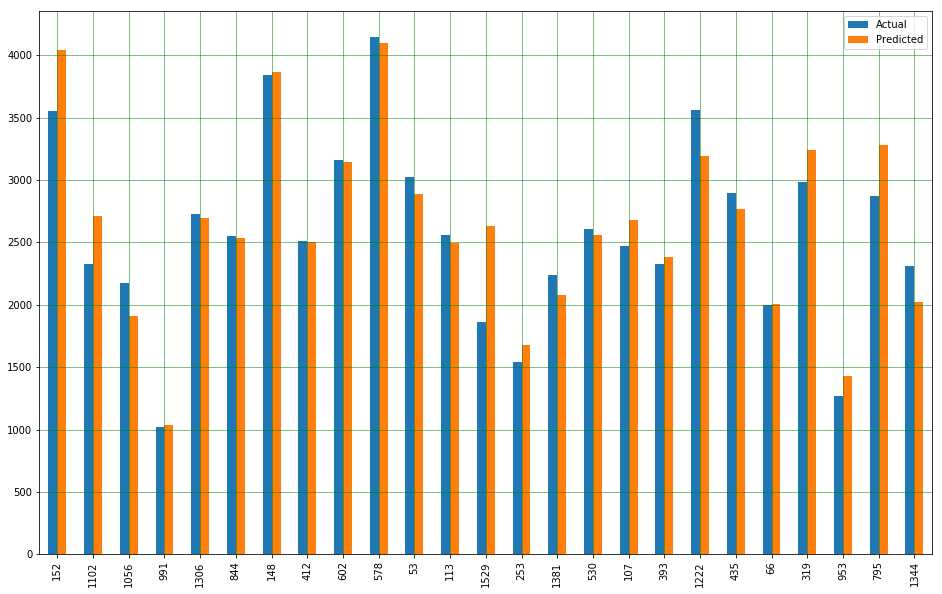

In [39]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [44]:
import sklearn.metrics as sm
r2 = sm.r2_score(df['Actual'], df['Predicted'])
print('R2 Score for the model is: ',r2) 

R2 Score for the model is:  0.9330730567285412
